## **Smart Water Analytics**


* Kowshik Harish S [CB.EN.U4CSE19223]
* Nishith N [CB.EN.U4CSE19231]

## **DATA UNDERSTANDING**

**LOAD DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from random import random
from math import sqrt
from numpy import concatenate
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Time_Series/main.csv', encoding = 'ISO-8859-1')
df.head()

,ï»¿Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [ ]:
print("Shape of Dataset: ",df.shape)

Shape of Dataset:  (5223, 8)


## **EXPLORATORY DATA ANALYSIS**

In [ ]:
# Remove old rows
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Remove not usefull columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [ ]:
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [ ]:
from datetime import datetime, date 

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


In [ ]:
df.tail()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
4194,2020-06-26,0.0,-25.07,25.7,-29930.688,2.5
4195,2020-06-27,0.0,-25.11,26.2,-31332.960,2.4
4196,2020-06-28,0.0,-25.19,26.9,-32120.928,2.4
4197,2020-06-29,0.0,-25.18,26.9,-30602.880,2.4
4198,2020-06-30,0.0,-25.25,27.3,-31878.144,2.4


In [ ]:
df.describe()

,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
count,4199.000000,4172.000000,4199.000000,4198.000000,4199.000000
mean,1.556633,-25.182534,15.030293,-28669.156619,2.372517
std,5.217923,2.945074,7.794871,4570.686434,0.589088
min,0.000000,-33.710000,-3.700000,-41890.176000,0.000000
25%,0.000000,-26.860000,8.800000,-31082.832000,2.100000
50%,0.000000,-25.170000,14.700000,-28389.744000,2.400000
75%,0.100000,-23.270000,21.400000,-26042.904000,2.700000
max,67.300000,-19.100000,33.000000,0.000000,4.100000


In [ ]:
df.dtypes

date                    datetime64[ns]
rainfall                       float64
depth_to_groundwater           float64
temperature                    float64
drainage_volume                float64
river_hydrometry               float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  4199 non-null   datetime64[ns]
 1   rainfall              4199 non-null   float64       
 2   depth_to_groundwater  4172 non-null   float64       
 3   temperature           4199 non-null   float64       
 4   drainage_volume       4198 non-null   float64       
 5   river_hydrometry      4199 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 197.0 KB


In [ ]:
col=list(df.columns)
for i in range(df.shape[1]):
  print(df.loc[:,col[i]].value_counts())

2009-01-01    1
2016-08-21    1
2016-08-23    1
2016-08-24    1
2016-08-25    1
             ..
2012-11-06    1
2012-11-07    1
2012-11-08    1
2012-11-09    1
2020-06-30    1
Name: date, Length: 4199, dtype: int64
0.0     3147
0.2      139
0.1       64
0.4       46
0.6       42
        ... 
25.6       1
11.3       1
28.6       1
9.9        1
22.0       1
Name: rainfall, Length: 223, dtype: int64
-26.45    17
-28.61    15
-26.38    15
-25.53    14
-23.30    14
          ..
-32.13     1
-32.11     1
-32.14     1
-32.30     1
-32.55     1
Name: depth_to_groundwater, Length: 1142, dtype: int64
 11.4    31
 14.7    26
 25.6    25
 20.6    24
 9.8     24
         ..
-1.6      1
-0.9      1
-1.5      1
-1.3      1
 30.7     1
Name: temperature, Length: 336, dtype: int64
 0.000        25
-27076.032     4
-26127.360     4
-31384.800     3
-29490.912     3
              ..
-40269.312     1
-37741.248     1
-39019.968     1
-36892.800     1
-30602.880     1
Name: drainage_volume, Length: 3669, d

In [ ]:
df.isnull().sum()

date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
dtype: int64

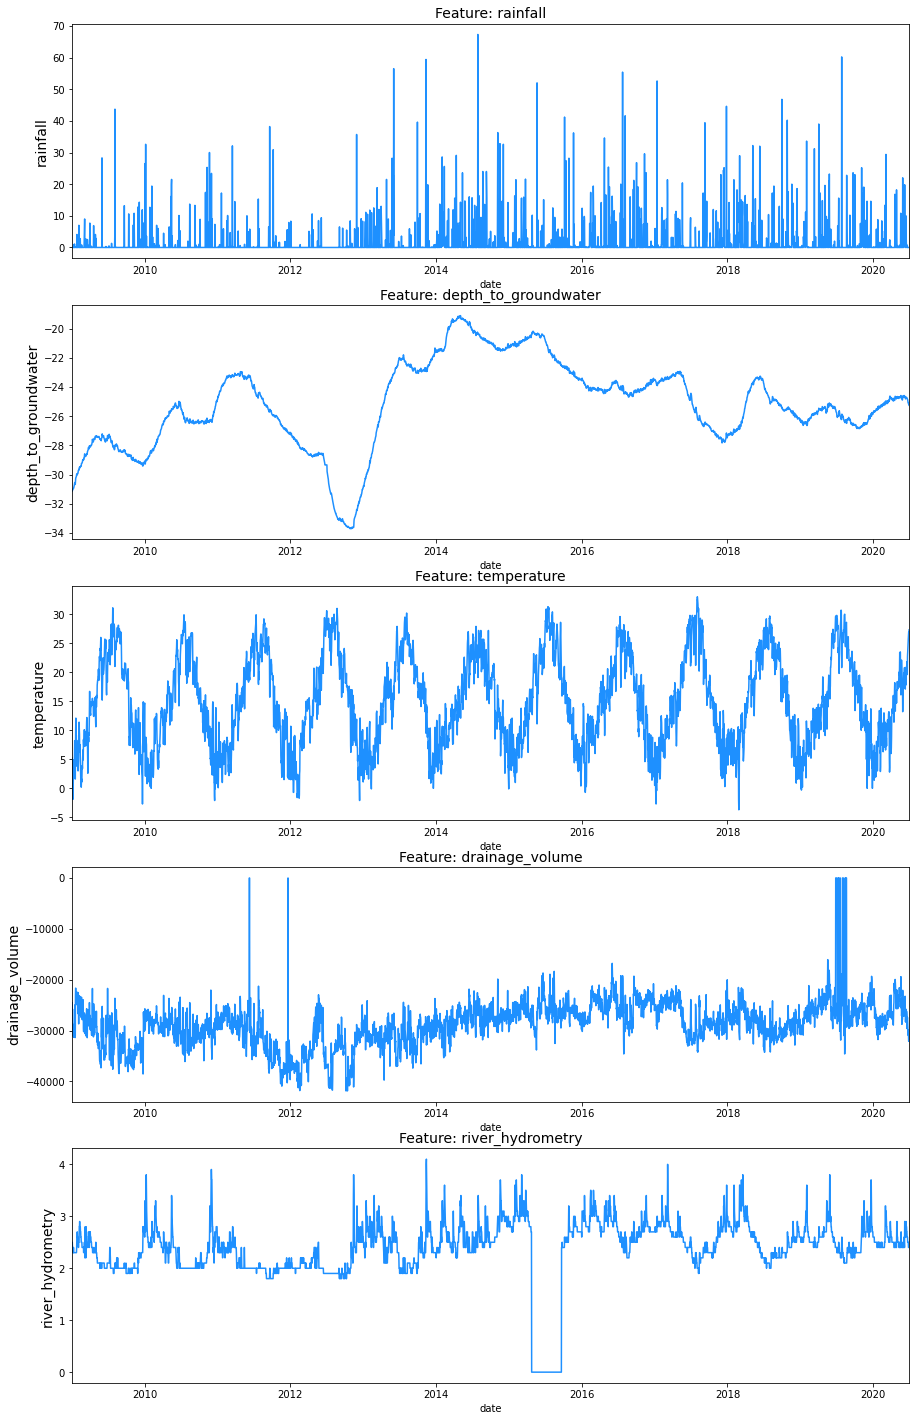

In [ ]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])   


## **DATA PREPROCESSING**

In [ ]:
df = df.sort_values(by='date')

# Check time intervals
df['delta'] = df['date'] - df['date'].shift(1)

df[['date', 'delta']].head()

,date,delta
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


In [ ]:
df['delta'].sum(), df['delta'].count()

(Timedelta('4198 days 00:00:00'), 4198)

**Handle Missings**

In [ ]:
df = df.drop('delta', axis=1)
df.isna().sum()

date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
dtype: int64

(733408.0, 737606.0)

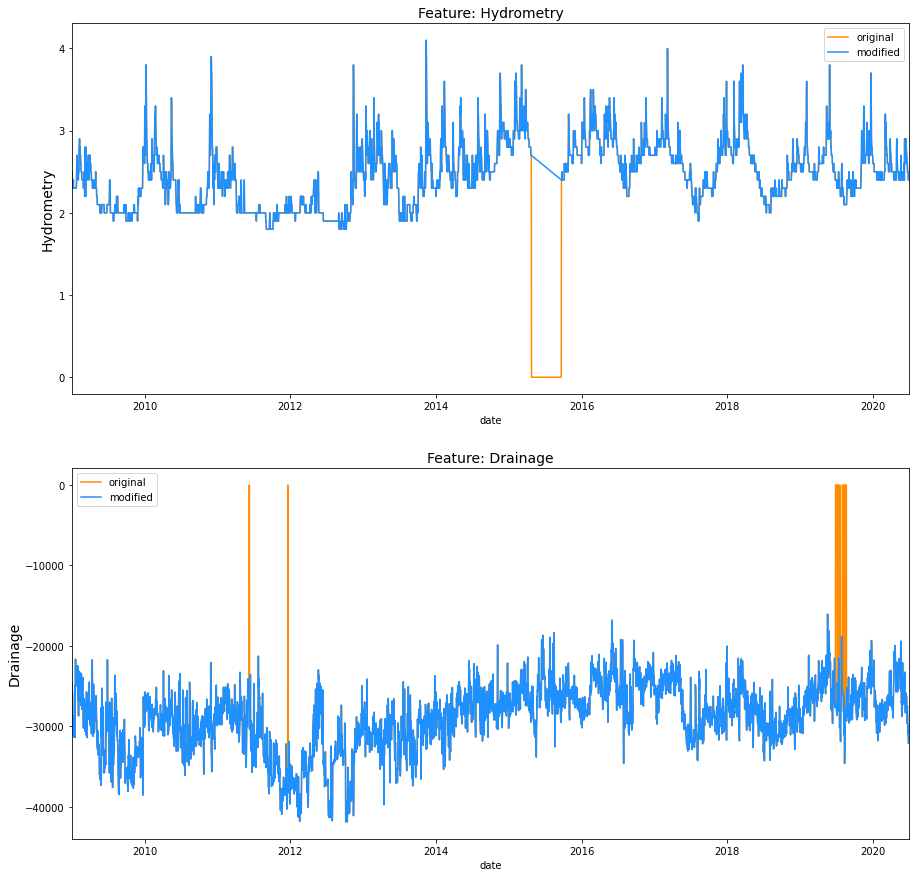

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df['drainage_volume'].copy()
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

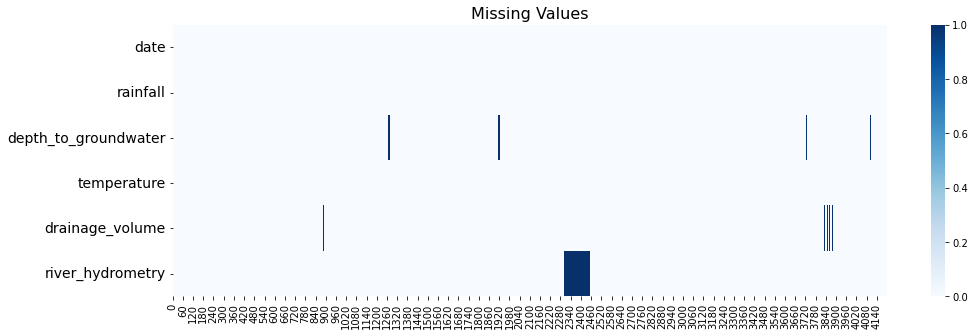

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()


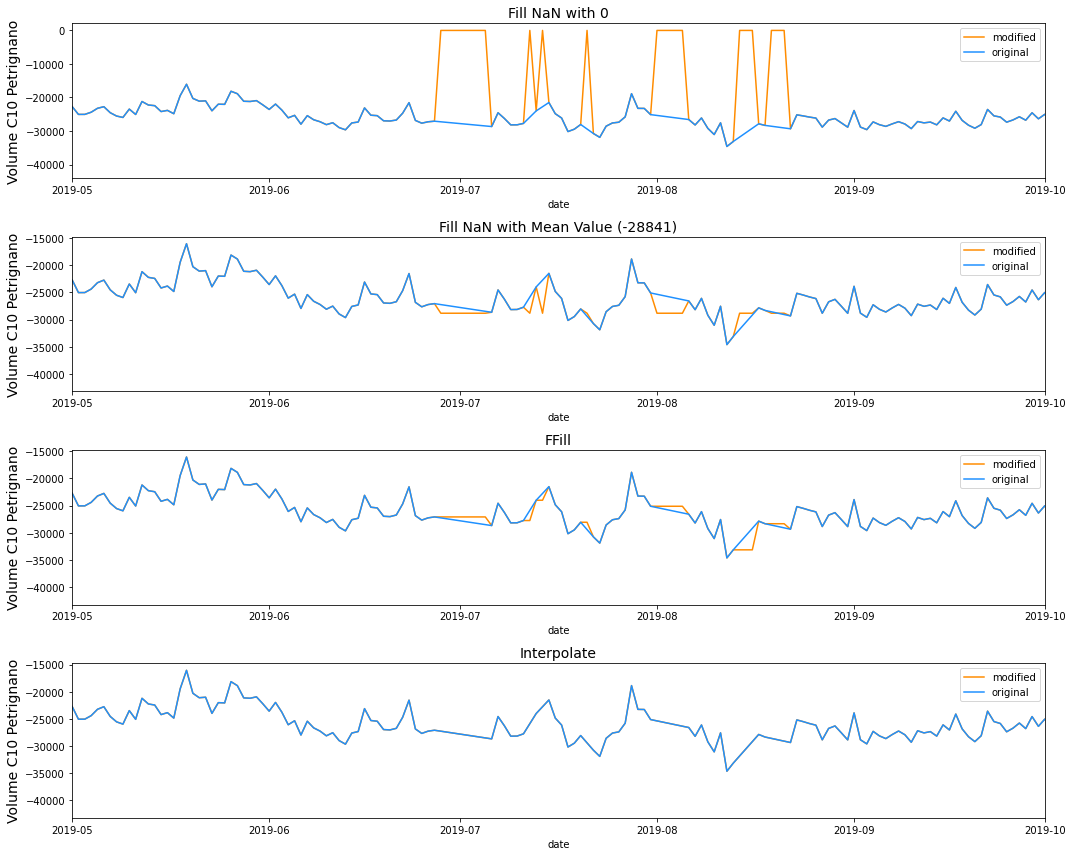

In [ ]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_drainage = df['drainage_volume'].mean()
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
sns.lineplot(x=df['date'], y=df['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()


## **INTERPOLATION AND RESAMPLING**

**Interpolation**

In [ ]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

**Resampling**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

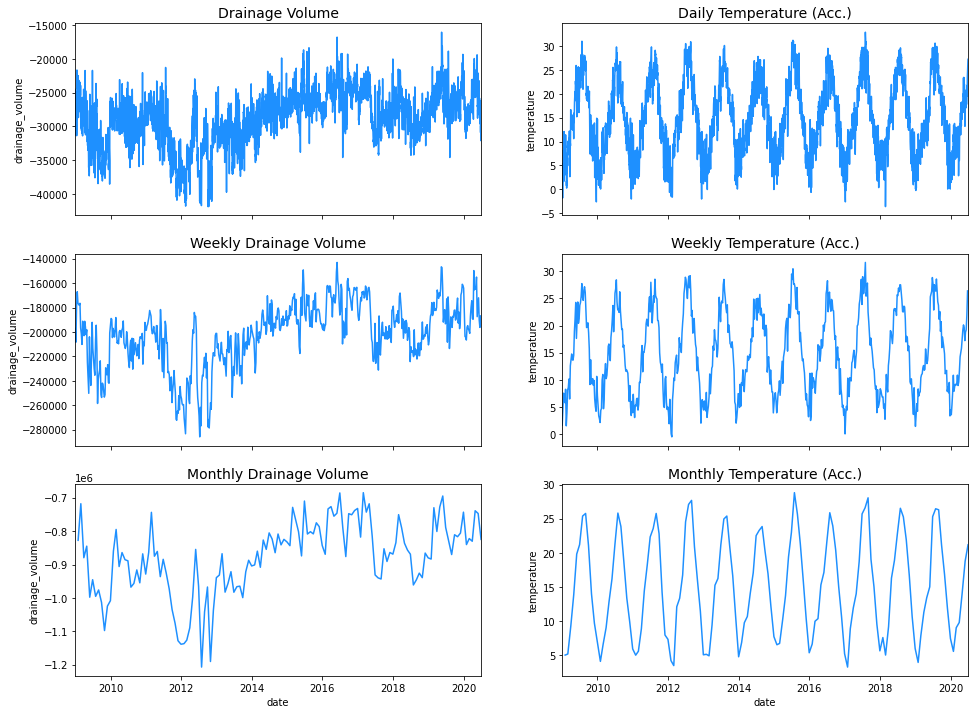

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(df['date'], df['drainage_volume'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Drainage Volume', fontsize=14)

resampled_df = df[['date','drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

resampled_df = df[['date','drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['drainage_volume'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(df['date'], df['temperature'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['date','temperature']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['temperature'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

resampled_df = df[['date','temperature']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['temperature'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

In [ ]:
downsample = df[['date',
                 'depth_to_groundwater', 
                 'temperature',
                 'drainage_volume', 
                 'river_hydrometry',
                 'rainfall'
                ]].resample('7D', on='date').mean().reset_index(drop=False)

df = downsample.copy()
df

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,rainfall
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286
...,...,...,...,...,...,...
595,2020-05-28,-24.697143,17.214286,-25591.062857,2.414286,3.514286
596,2020-06-04,-24.638571,18.785714,-24567.099429,2.628571,6.600000
597,2020-06-11,-24.751429,19.200000,-27178.416000,2.771429,2.857143
598,2020-06-18,-24.822857,21.942857,-28030.134857,2.600000,0.200000


**Stationarity**

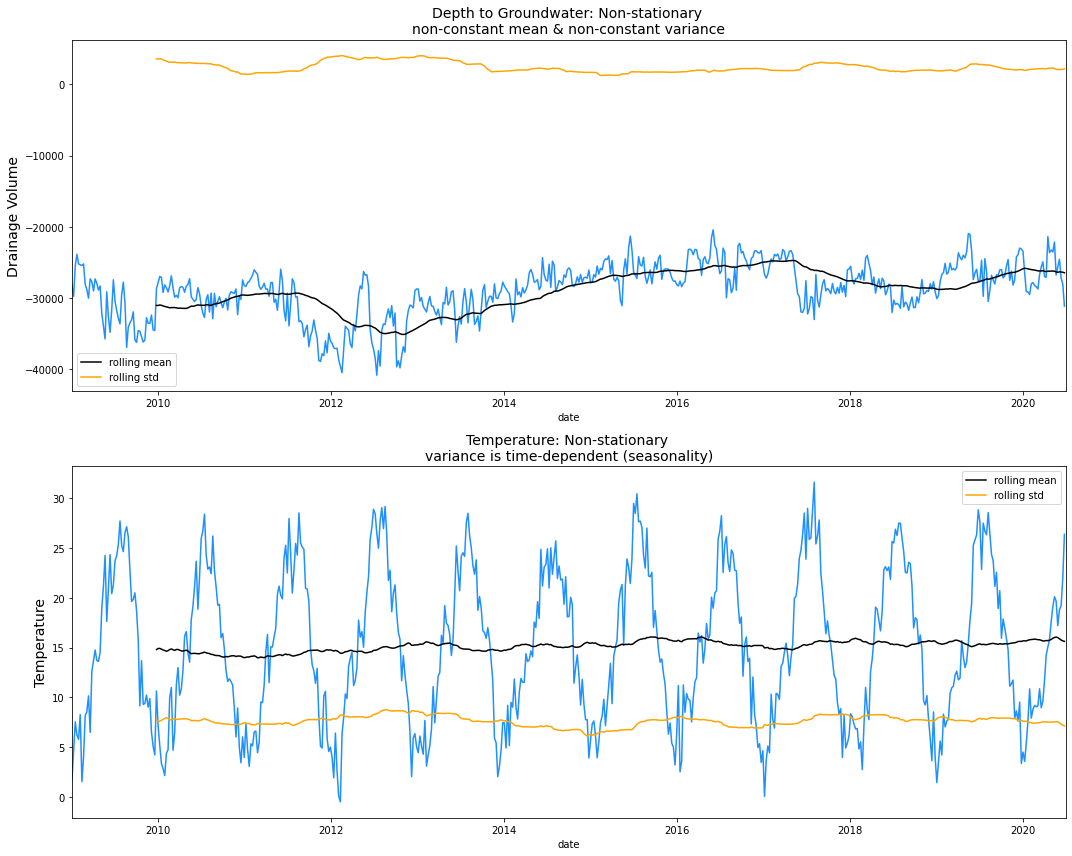

In [ ]:
# A year has 52 weeks (52 weeks * 7 days per week) aporx.
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['drainage_volume'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Drainage Volume', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=df['date'], y=df['temperature'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

**Augmented Dickey-Fuller**

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['depth_to_groundwater'].values)
result

(-2.880201649316661,
 0.0476991909202088,
 7,
 592,
 {'1%': -3.441444394224128,
  '5%': -2.8664345376276454,
  '10%': -2.569376663737217},
 -734.3154255877616)

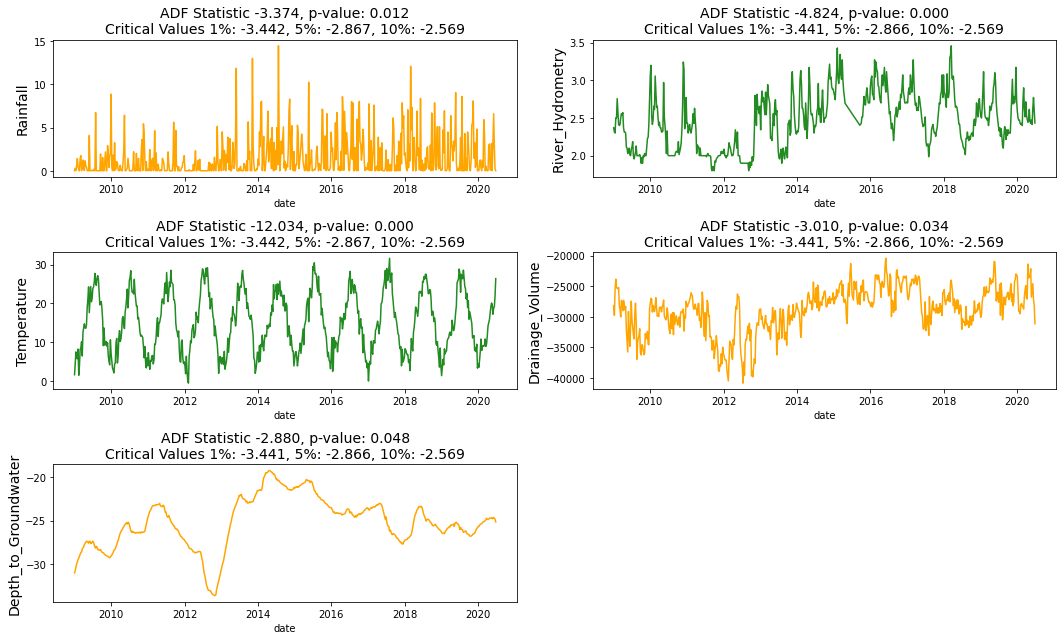

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['rainfall'].values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(df['temperature'].values, 'Temperature', ax[1, 0])
visualize_adfuller_results(df['river_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(df['drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(df['depth_to_groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

**Transforming**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


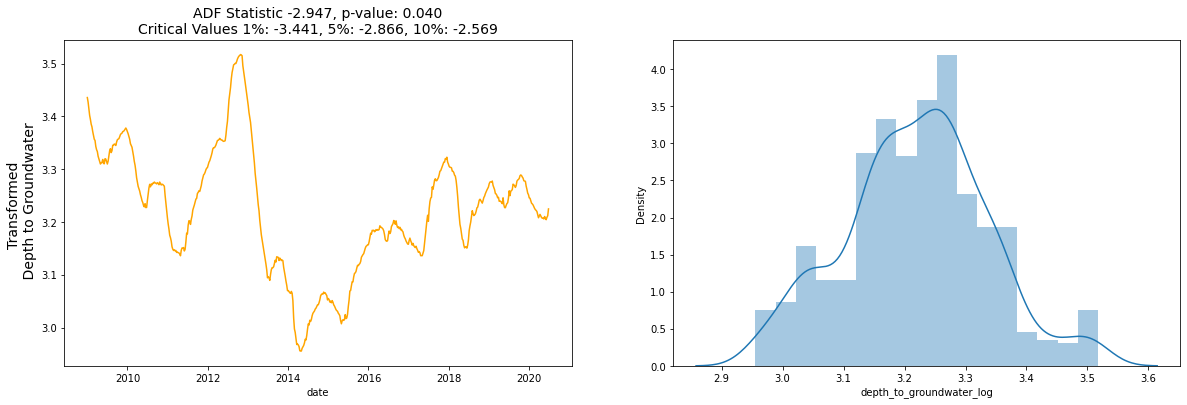

In [ ]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['depth_to_groundwater_log'] = np.log(abs(df['depth_to_groundwater']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['depth_to_groundwater_log'], 'Transformed \n Depth to Groundwater', ax[0])

sns.distplot(df['depth_to_groundwater_log'], ax=ax[1])

**Differencing**

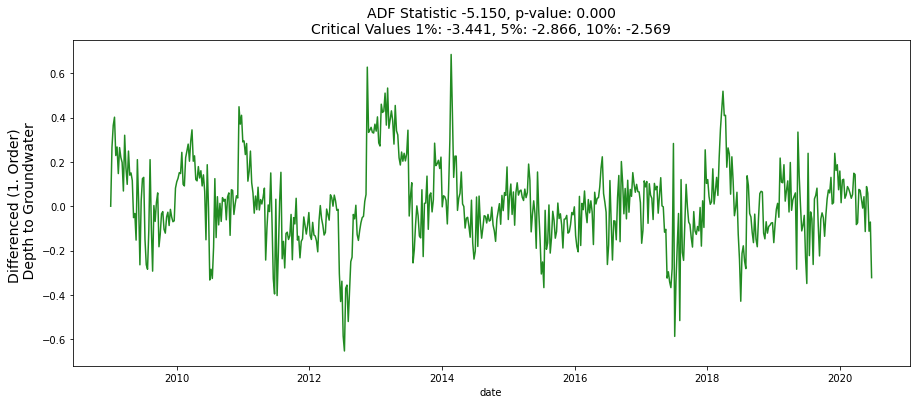

In [ ]:
ts_diff = np.diff(df['depth_to_groundwater'])
df['depth_to_groundwater_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['depth_to_groundwater_diff_1'], 'Differenced (1. Order) \n Depth to Groundwater', ax)

## **FEATURE ENGINEERING**

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

df[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


,date,year,month,day,day_of_year,week_of_year,quarter,season
0,2009-01-01,2009,1,1,1,1,1,1
1,2009-01-08,2009,1,8,8,2,1,1
2,2009-01-15,2009,1,15,15,3,1,1
3,2009-01-22,2009,1,22,22,4,1,1
4,2009-01-29,2009,1,29,29,5,1,1


**Cyclical Features**


The new time features are cyclical. For example,the feature month cycles between 1 and 12 for every year. While the difference between each month increments by 1 during the year, between two years the month feature jumps from 12 (December) to 1 (January). This results in a -11 difference, which can confuse a lot of models.

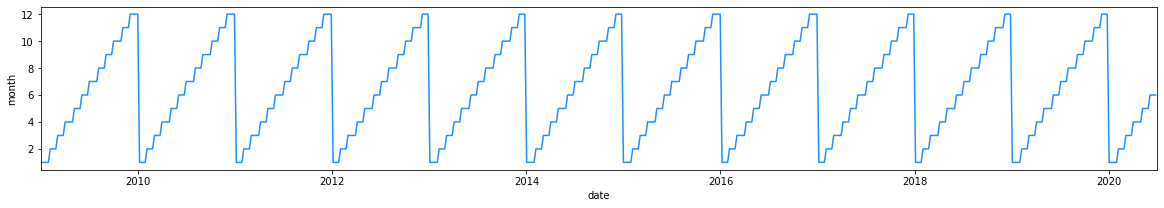

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['date'], y=df['month'], color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

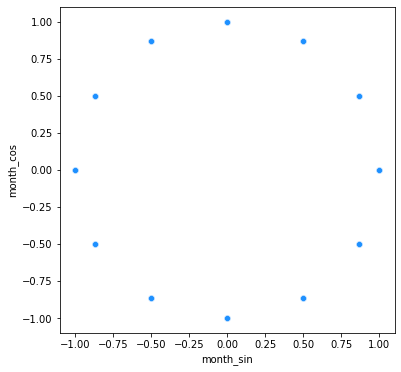

In [ ]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

**Time Series Decomposition**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume', 
    'river_hydrometry', 'depth_to_groundwater'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

**LAG**

In [ ]:
df['t+1'] = df['rainfall'].shift(1)
df['t+2'] = df['rainfall'].shift(2)
df['t+3'] = df['rainfall'].shift(3)
df

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,rainfall,depth_to_groundwater_log,depth_to_groundwater_diff_1,year,month,...,temperature_seasonal,drainage_volume_trend,drainage_volume_seasonal,river_hydrometry_trend,river_hydrometry_seasonal,depth_to_groundwater_trend,depth_to_groundwater_seasonal,t+1,t+2,t+3
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000,3.435553,0.000000,2009,1,...,-9.739920,-32404.467037,1551.335303,2.164913,0.207547,-29.571657,-0.643767,NaN,NaN,NaN
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714,3.427004,0.264286,2009,1,...,-9.838787,-32374.371773,938.070633,2.167252,0.186527,-29.535110,-0.572078,0.000000,NaN,NaN
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571,3.415100,0.364286,2009,1,...,-10.002955,-32344.276508,832.934327,2.169592,0.105423,-29.498564,-0.484281,0.285714,0.000000,NaN
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714,3.401816,0.401429,2009,1,...,-9.973161,-32314.181244,518.836188,2.171931,0.131993,-29.462017,-0.417712,0.028571,0.285714,0.000000
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286,3.394173,0.228571,2009,1,...,-10.246938,-32284.085980,238.454010,2.174270,0.152668,-29.425470,-0.362900,0.585714,0.028571,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2020-05-28,-24.697143,17.214286,-25591.062857,2.414286,3.514286,3.206688,0.088571,2020,5,...,6.614221,-25143.731910,671.758101,2.541073,-0.066366,-25.936518,1.171447,0.000000,3.171429,0.085714
596,2020-06-04,-24.638571,18.785714,-24567.099429,2.628571,6.600000,3.204313,0.058571,2020,6,...,7.359927,-25114.811284,-99.901340,2.541325,-0.039833,-25.938073,1.132335,3.514286,0.000000,3.171429
597,2020-06-11,-24.751429,19.200000,-27178.416000,2.771429,2.857143,3.208883,-0.112857,2020,6,...,7.979350,-25085.890658,-95.656540,2.541577,-0.116460,-25.939627,1.028882,6.600000,3.514286,0.000000
598,2020-06-18,-24.822857,21.942857,-28030.134857,2.600000,0.200000,3.211765,-0.071429,2020,6,...,9.269845,-25056.970031,-588.865147,2.541828,-0.165301,-25.941181,0.920325,2.857143,6.600000,3.514286


In [ ]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)
df.head()

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,rainfall,depth_to_groundwater_log,depth_to_groundwater_diff_1,year,month,...,river_hydrometry_seasonal_shift_b_2m,river_hydrometry_seasonal_shift_b_1m,river_hydrometry_seasonal_shift_1m,river_hydrometry_seasonal_shift_2m,river_hydrometry_seasonal_shift_3m,depth_to_groundwater_seasonal_shift_b_2m,depth_to_groundwater_seasonal_shift_b_1m,depth_to_groundwater_seasonal_shift_1m,depth_to_groundwater_seasonal_shift_2m,depth_to_groundwater_seasonal_shift_3m
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000,3.435553,0.000000,2009,1,...,0.206555,0.152668,NaN,NaN,NaN,0.066340,-0.362900,NaN,NaN,NaN
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714,3.427004,0.264286,2009,1,...,0.210803,0.235327,NaN,NaN,NaN,0.203030,-0.275904,NaN,NaN,NaN
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571,3.415100,0.364286,2009,1,...,0.318394,0.312137,NaN,NaN,NaN,0.304813,-0.212800,NaN,NaN,NaN
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714,3.401816,0.401429,2009,1,...,0.292617,0.260525,NaN,NaN,NaN,0.407139,-0.103563,NaN,NaN,NaN
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286,3.394173,0.228571,2009,1,...,0.200299,0.206555,0.207547,NaN,NaN,0.545598,0.066340,-0.643767,NaN,NaN


## **DATA VISUALIZATION**

**Line Plot**

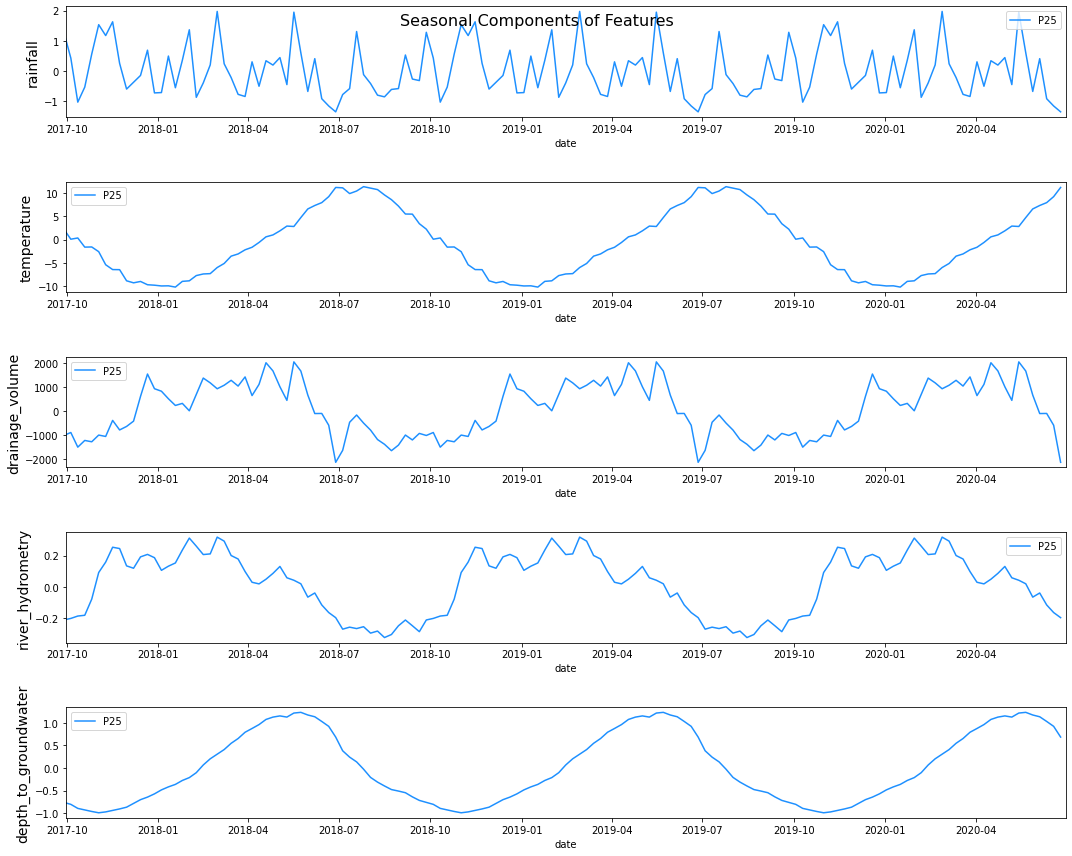

In [ ]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

**Heat Map**

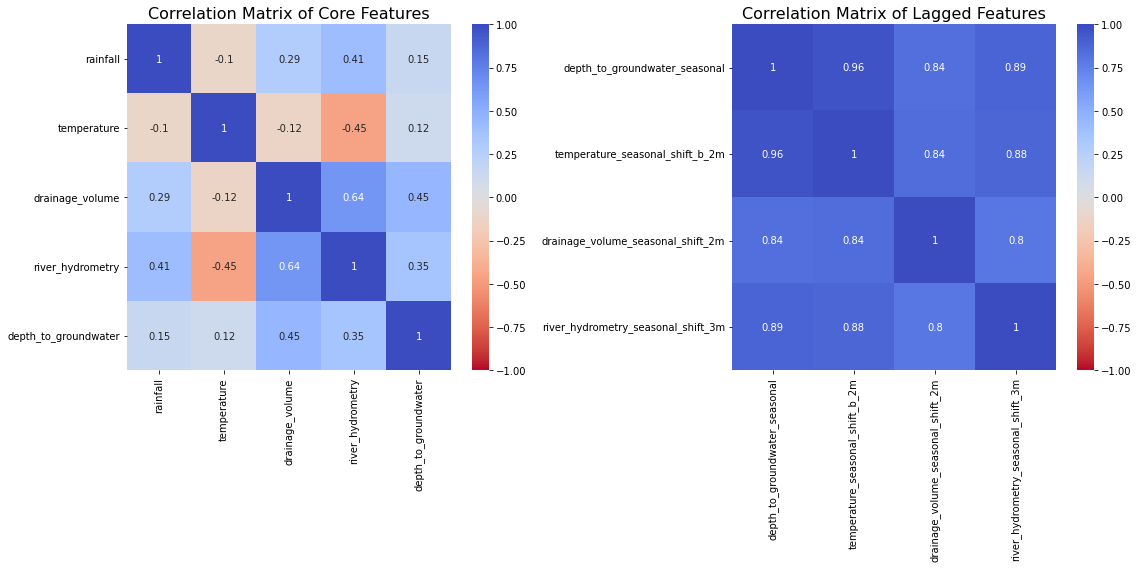

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'depth_to_groundwater_seasonal',         
    'temperature_seasonal_shift_b_2m',
    'drainage_volume_seasonal_shift_2m', 
    'river_hydrometry_seasonal_shift_3m'
]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

**Stacked Line Plot**

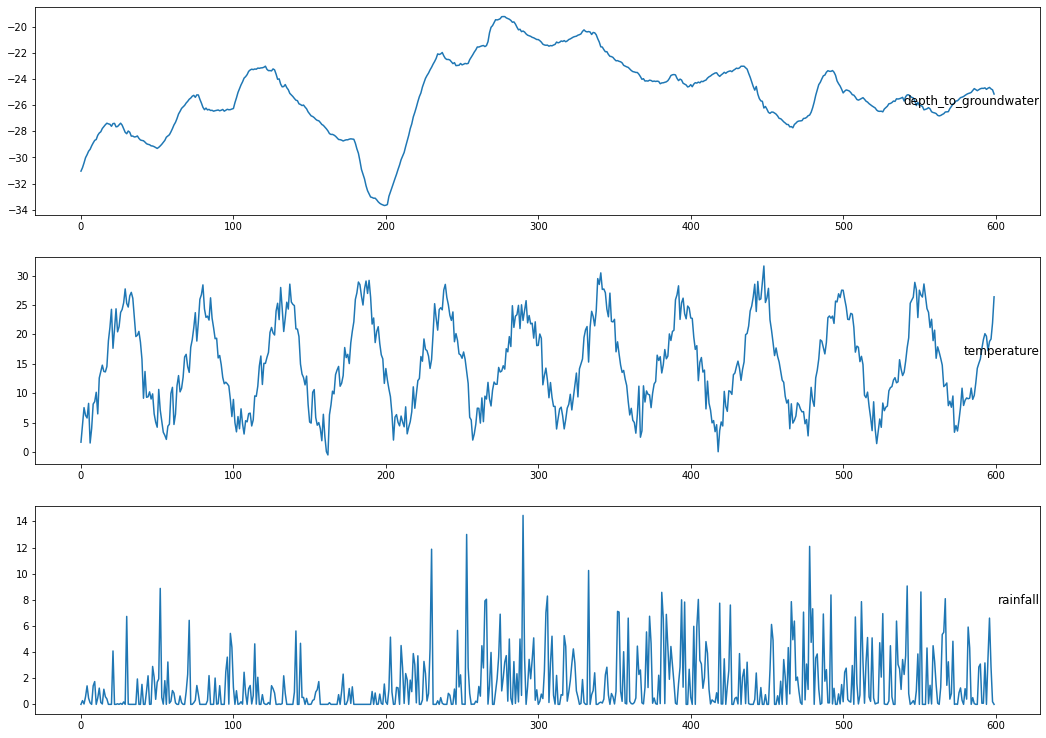

In [ ]:
def series_visualize(data, cols):
    dataset = data[cols]
    values = dataset.values
    # specify columns to plot    
    groups = [i for i in range(len(cols))]
    j = 1
    plt.figure(figsize=(18,13))
    for group in groups:
        plt.subplot(len(groups), 1, j)
        plt.plot(values[:, group])
        plt.title(dataset.columns[group], y=0.5, loc='right')
        j += 1
    plt.show()
series_visualize(df,['depth_to_groundwater','temperature','rainfall'])

**Histogram**

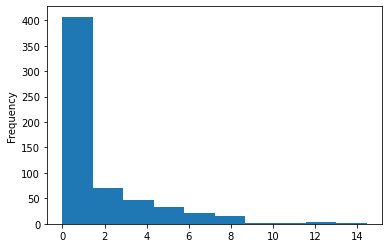

In [ ]:
df['rainfall'].plot(kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


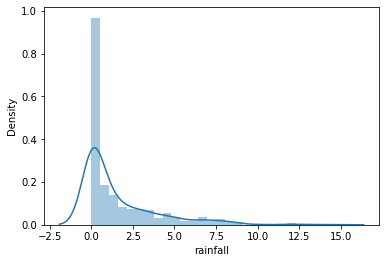

In [ ]:
sns.distplot(df['rainfall'])

**Box Plot**

<Figure size 720x1080 with 0 Axes>

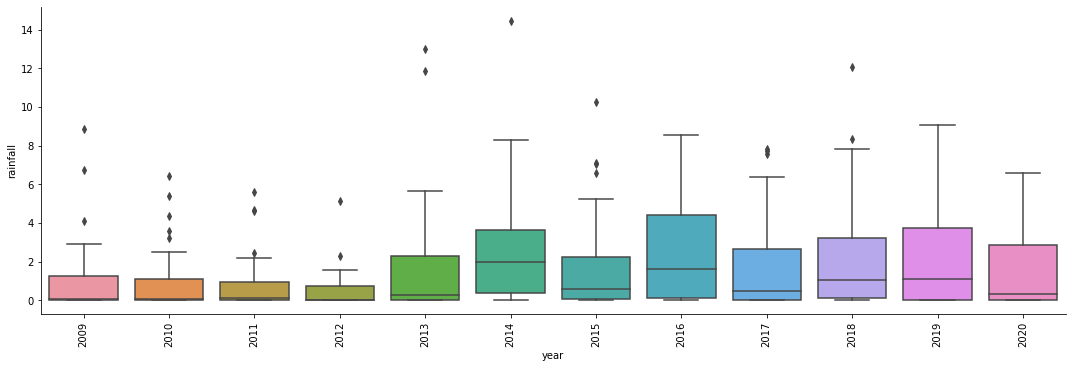

In [ ]:
plt.figure(figsize=(10,15))
graph1=sns.catplot(x="year",y="rainfall",kind="box",data=df,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

**Box Plot(Rainfall in 2017)**

<Figure size 720x1080 with 0 Axes>

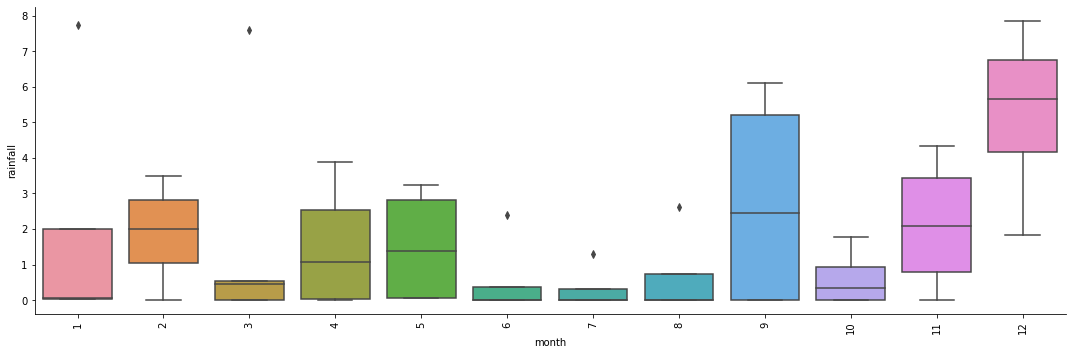

In [ ]:
plt.figure(figsize=(10,15))
graph1=sns.catplot(x="month",y="rainfall",kind="box",data=df[df['year']==2017],height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

**Box Plot(Rainfall in 2018)**

<Figure size 720x1080 with 0 Axes>

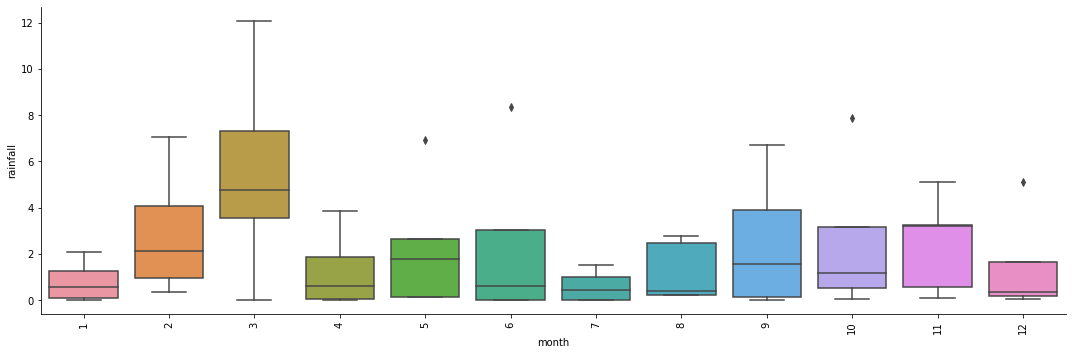

In [ ]:
plt.figure(figsize=(10,15))
graph1=sns.catplot(x="month",y="rainfall",kind="box",data=df[df['year']==2018],height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

**Box Plot(Rainfall in 2019)**

<Figure size 720x1080 with 0 Axes>

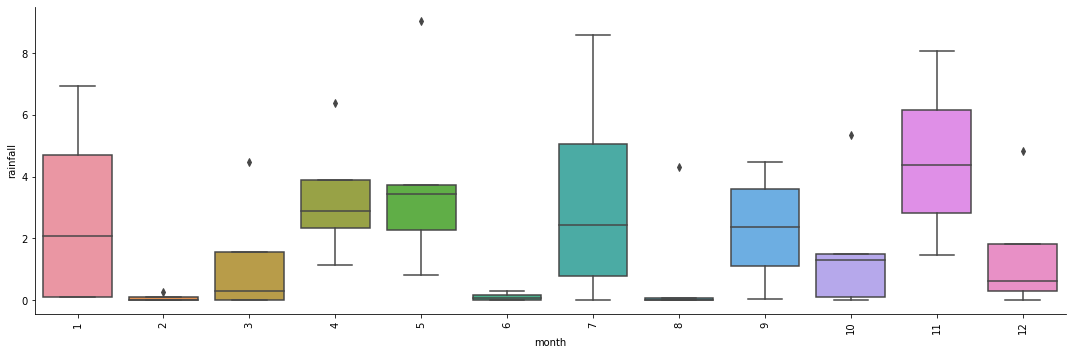

In [ ]:
plt.figure(figsize=(10,15))
graph1=sns.catplot(x="month",y="rainfall",kind="box",data=df[df['year']==2019],height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

**Density Plot**

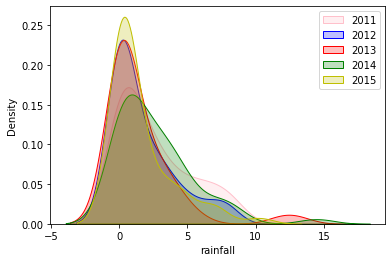

In [ ]:
fig = sns.kdeplot(df[df['year']==2016]['rainfall'], shade=True, color="pink", label="2011")
fig = sns.kdeplot(df[df['year']==2017]['rainfall'], shade=True, color="b", label="2012")
fig = sns.kdeplot(df[df['year']==2013]['rainfall'], shade=True, color="r", label="2013")
fig = sns.kdeplot(df[df['year']==2014]['rainfall'], shade=True, color="g", label="2014")
fig = sns.kdeplot(df[df['year']==2015]['rainfall'], shade=True, color="y", label="2015")
plt.legend()
plt.show()

**Scatter Plot**

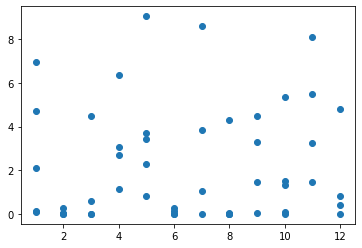

In [ ]:
plt.scatter('month', 'rainfall', data=df[df['year']==2019])

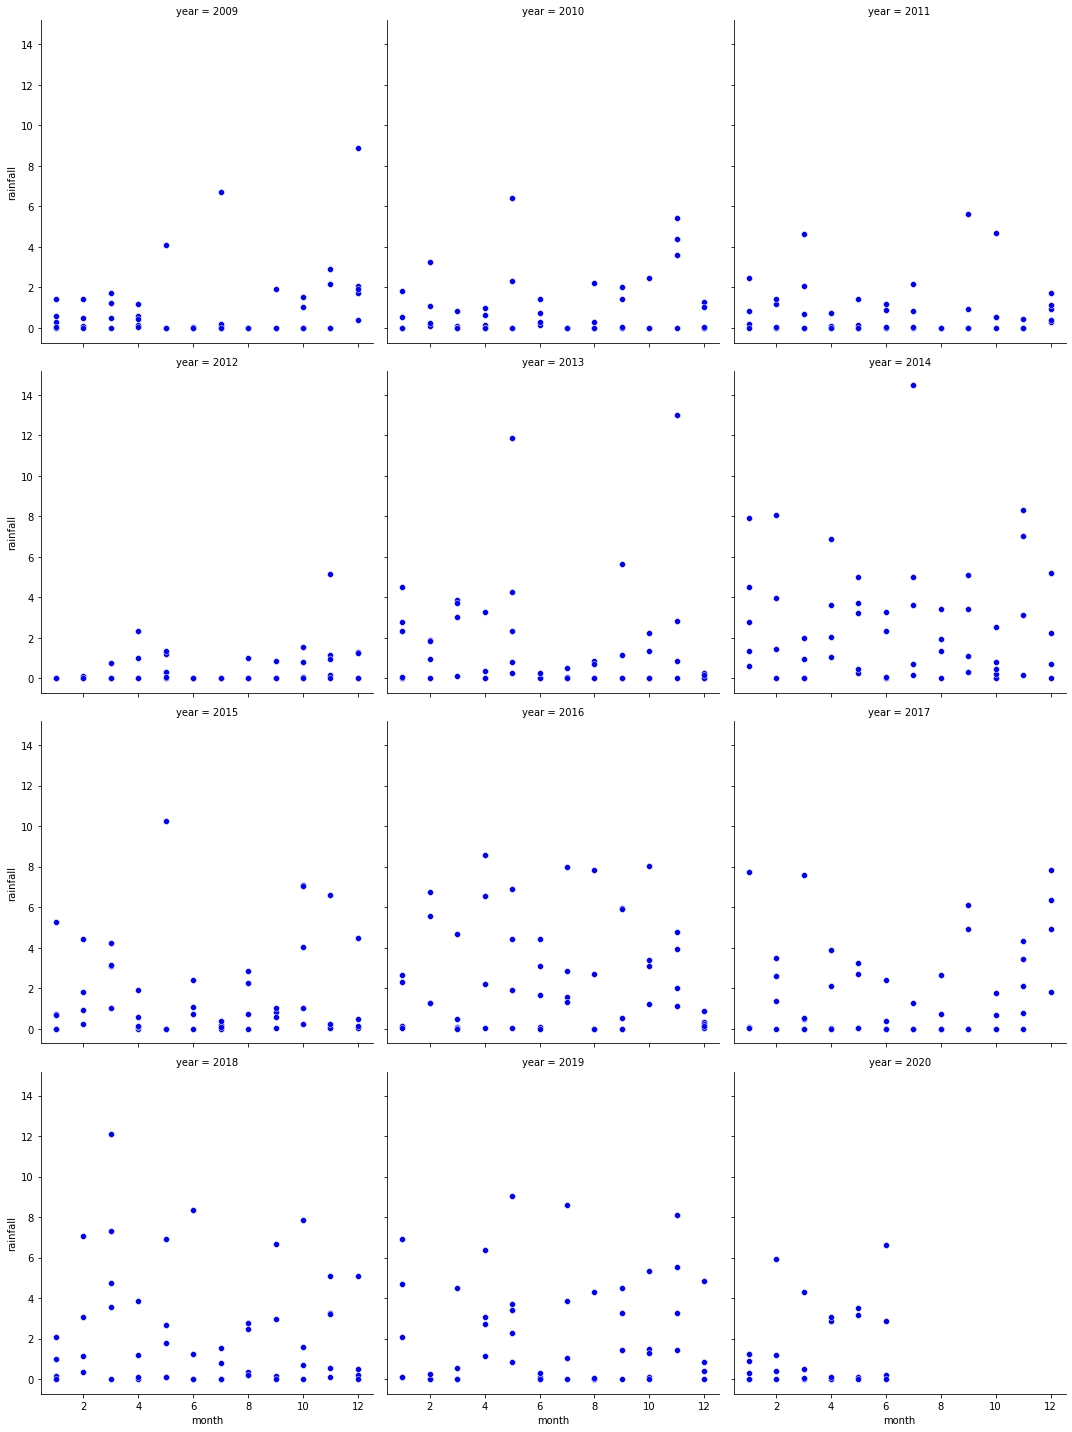

In [ ]:
sns.relplot(x="month",y="rainfall",kind="scatter",data=df,col="year",col_wrap=3,color="b")

## **AUTO CORRELATION FUNCTION**

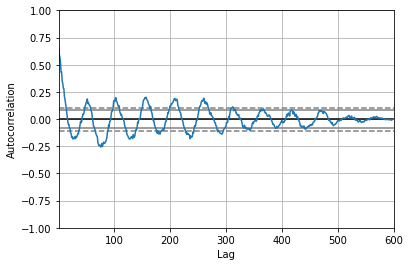

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['depth_to_groundwater_diff_1'])
plt.show()

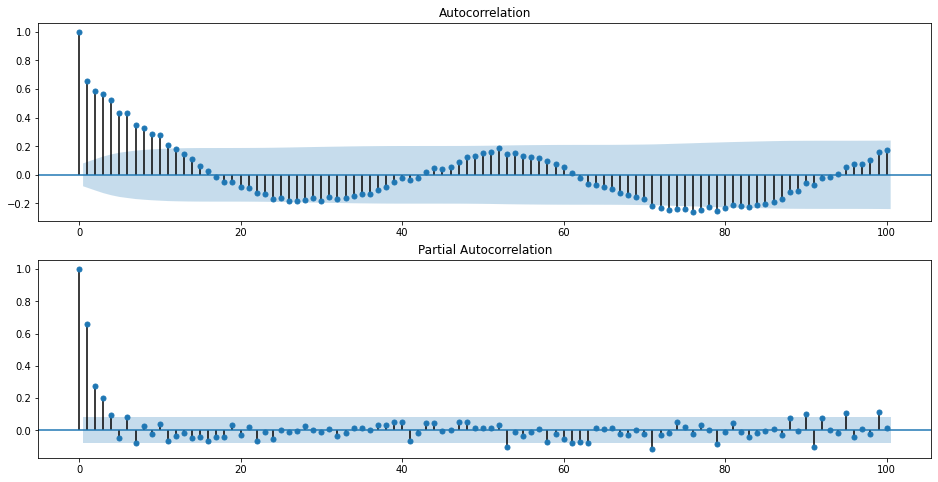

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[1])

plt.show()

**Models for Univariate Time Series**

In [ ]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

510 90


## **POWER TRANSFORM**

**SQUARE ROOT TRANSFORMATION**

In [ ]:
df['river_hydrometry_sqrt'] = np.sqrt(df['river_hydrometry'])

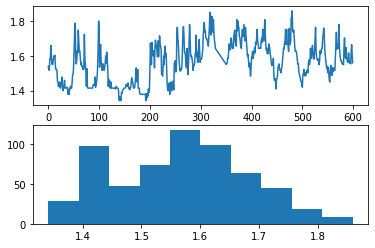

In [ ]:
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(df['river_hydrometry_sqrt'])
# histogram
plt.subplot(212)
plt.hist(df['river_hydrometry_sqrt'])
plt.show()

**LOG TRANSFORMATION**

In [ ]:
df['river_hydrometry_log'] = np.log(df['river_hydrometry'])

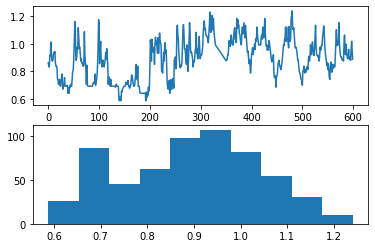

In [ ]:
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(df['river_hydrometry_log'])
# histogram
plt.subplot(212)
plt.hist(df['river_hydrometry_log'])
plt.show()

**BOX COX TRANSFORMATION**

In [ ]:
from scipy.stats import boxcox

df['river_hydrometry_boxcox'], lam = boxcox(df['river_hydrometry'])

In [ ]:
lam

0.16981673539206402

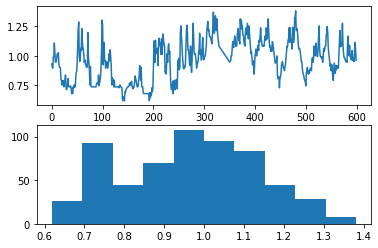

In [ ]:
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(df['river_hydrometry_boxcox'])
# histogram
plt.subplot(212)
plt.hist(df['river_hydrometry_boxcox'])
plt.show()

## **Use moving average smoothing for time df forecasting**

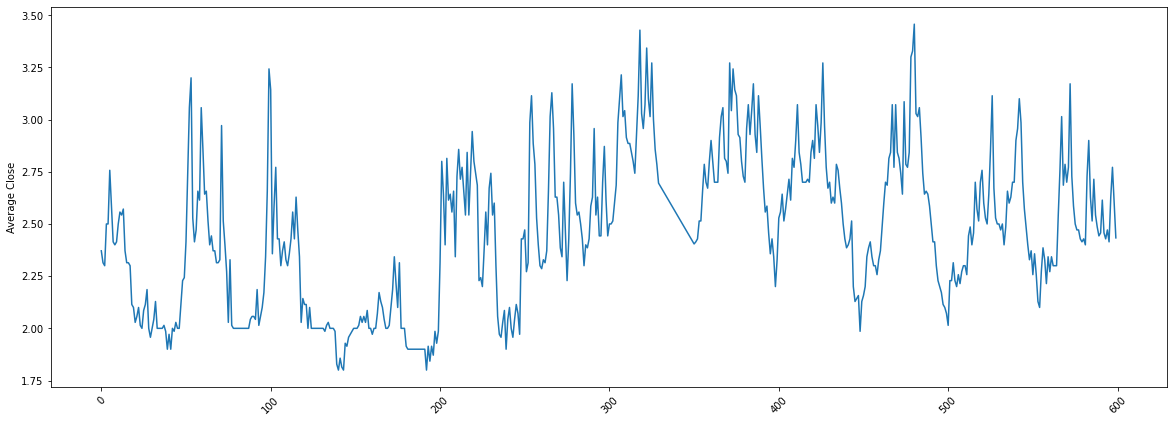

In [ ]:
series = df["river_hydrometry"]
plt.figure(figsize=(20,7))
series.plot()
plt.ylabel("Average Close")
plt.xticks(rotation=45)
plt.show()

### **Moving Average as Data Preparation**

In [ ]:
rolling_mean = series.rolling(window=3).mean()
display(rolling_mean)

0           NaN
1           NaN
2      2.328571
3      2.371429
4      2.433333
         ...   
595    2.438095
596    2.504762
597    2.604762
598    2.666667
599    2.601587
Name: river_hydrometry, Length: 600, dtype: float64

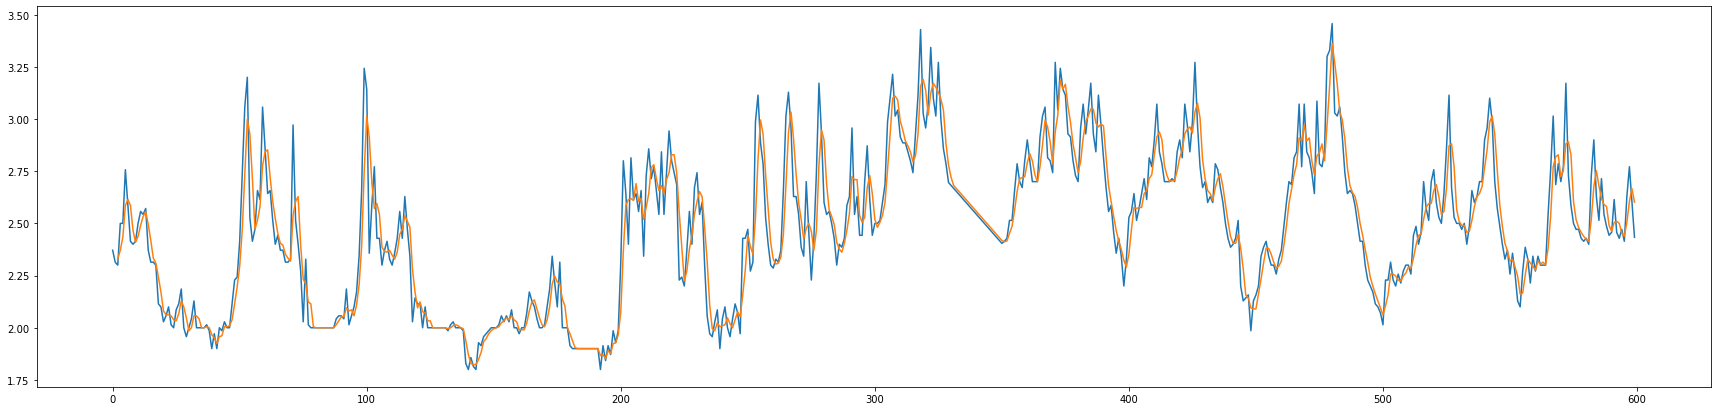

In [ ]:
plt.figure(figsize=(30,7))
series.plot()
rolling_mean.plot()
plt.show()

In [ ]:
df2 = pd.DataFrame(series)
width = 3
lag1 = df2.shift(1)
lag3 = df2.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = pd.concat([means, lag1, df2], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

       mean       t-1       t+1
0       NaN       NaN  2.371429
1       NaN  2.371429  2.314286
2       NaN  2.314286  2.300000
3       NaN  2.300000  2.500000
4  2.328571  2.500000  2.500000
5  2.371429  2.500000  2.757143
6  2.433333  2.757143  2.585714
7  2.585714  2.585714  2.414286
8  2.614286  2.414286  2.400000
9  2.585714  2.400000  2.414286


### **Moving Average as Prediction**

predicted=2.328571, expected=2.500000, error=0.171429
predicted=2.371429, expected=2.500000, error=0.128571
predicted=2.433333, expected=2.757143, error=0.323810
predicted=2.585714, expected=2.585714, error=0.000000
predicted=2.614286, expected=2.414286, error=-0.200000
predicted=2.585714, expected=2.400000, error=-0.185714
predicted=2.466667, expected=2.414286, error=-0.052381
predicted=2.409524, expected=2.500000, error=0.090476
predicted=2.438095, expected=2.557143, error=0.119048
predicted=2.490476, expected=2.542857, error=0.052381
predicted=2.533333, expected=2.571429, error=0.038095
predicted=2.557143, expected=2.371429, error=-0.185714
predicted=2.495238, expected=2.314286, error=-0.180952
predicted=2.419048, expected=2.314286, error=-0.104762
predicted=2.333333, expected=2.300000, error=-0.033333
predicted=2.309524, expected=2.114286, error=-0.195238
predicted=2.242857, expected=2.100000, error=-0.142857
predicted=2.171429, expected=2.028571, error=-0.142857
predicted=2.080952

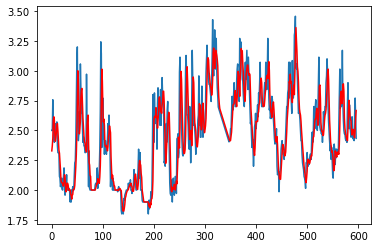

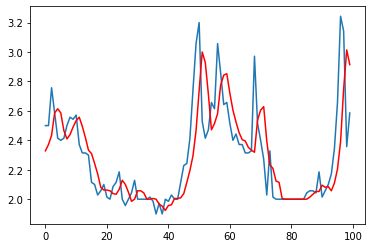

In [ ]:
from sklearn.metrics import mean_squared_error

# Prepare
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = np.mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f, error=%f' % (yhat, obs, obs-yhat))
error = mean_squared_error(test, predictions)
print('\n\nTest MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()

## **Identification Of White Noise Time Series**

If a time series is white noise, it is a sequence of random numbers and cannot be predicted. 


A time series is white noise if the variables are independent and identically distributed with a mean of zero.

This means that all variables have the same variance (sigma^2) and each value has a zero correlation with all other values in the series.


If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.

In [ ]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(df['river_hydrometry'], lags=[30], boxpierce=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([3480.49862624]), array([0.]), array([3429.92644937]), array([0.]))

The value 3480.49862624 is the value of the test statistic for the Ljung-Box test and 0.0 is its p-value as per the Chi-square table.

The value 3429.92644937 is the test statistic of the Box-Pierce test and 0.0 is its p-value as per the Chi-square tables.



## **Identification Of Random Walk Time Series**

In [ ]:
from random import gauss
import pandas as pd 
from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

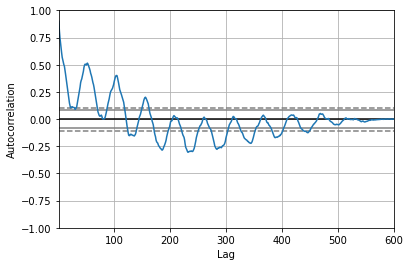

In [ ]:
#autocorrelation of a random walk
random_walk = df['river_hydrometry']
autocorrelation_plot(random_walk)
plt.show()

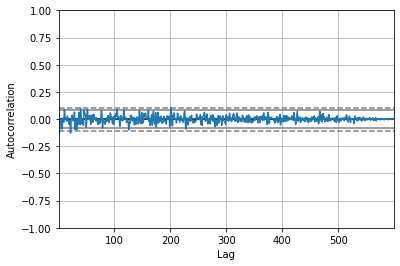

In [ ]:
# plot the autocorrelation of a differenced random walk
# create random walk
random_walk = df['river_hydrometry']
# take difference
diff = list()
for i in range(1, len(random_walk)):
	value = random_walk[i] - random_walk[i - 1]
	diff.append(value)
# line plot
autocorrelation_plot(diff)
plt.show()

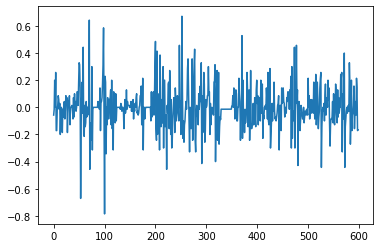

In [ ]:
# calculate and plot a differenced random walk
# create random walk
random_walk = df['river_hydrometry']
# take difference
diff = list()
for i in range(1, len(random_walk)):
	value = random_walk[i] - random_walk[i - 1]
	diff.append(value)
# line plot
plt.plot(diff)
plt.show()

## **Decompose Time Series Data**

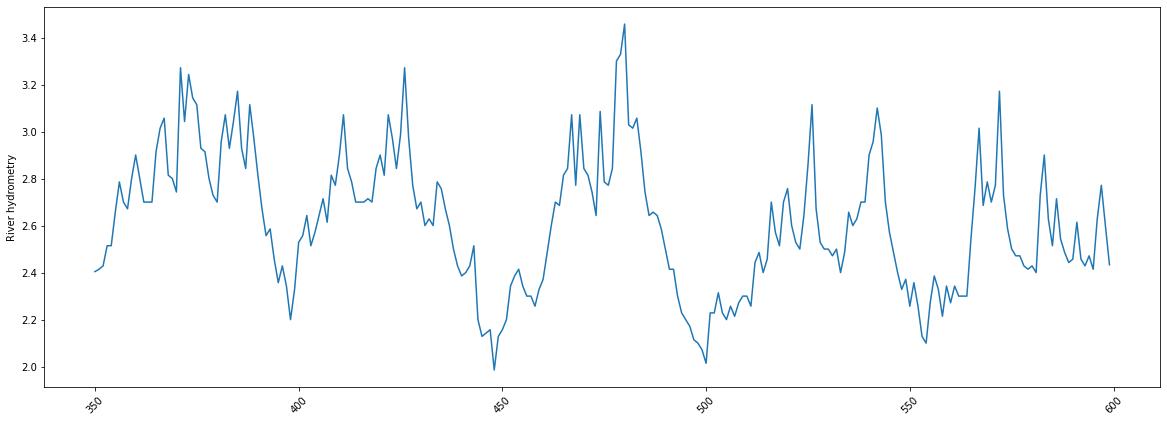

In [ ]:
series = df["river_hydrometry"][350:]
plt.figure(figsize=(20,7))
series.plot()
plt.ylabel("River hydrometry")
plt.xticks(rotation=45)
plt.show()

Period=120

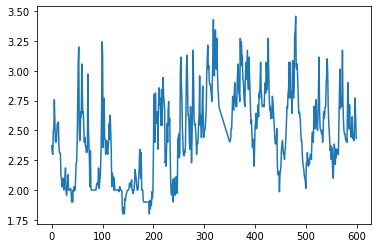

In [ ]:
result = seasonal_decompose(df['river_hydrometry'], model='multiplicative',period=120)
result.observed.plot()

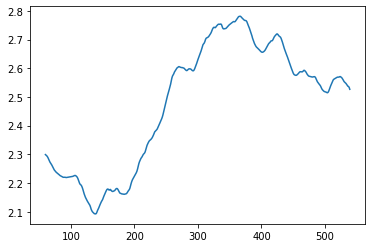

In [ ]:
result.trend.plot()

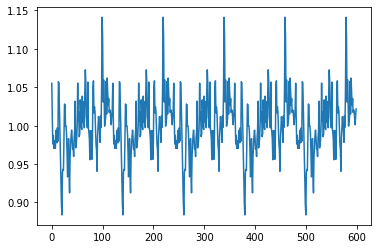

In [ ]:
result.seasonal.plot()

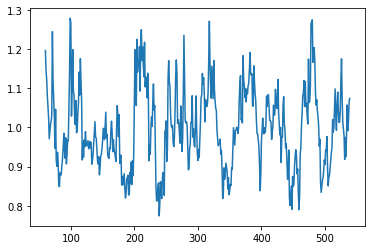

In [ ]:
result.resid.plot()

Period=300

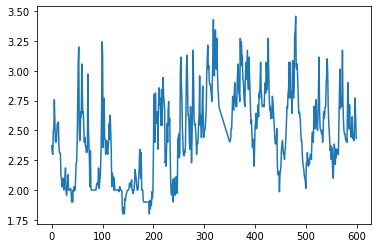

In [ ]:
result1 = seasonal_decompose(df['river_hydrometry'], model='multiplicative',period=300)
result1.observed.plot()

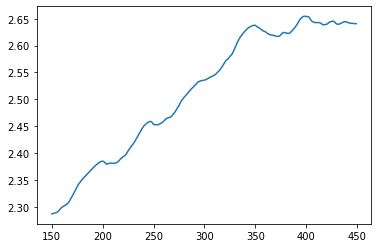

In [ ]:
result1.trend.plot()

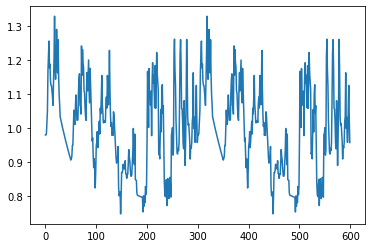

In [ ]:
result1.seasonal.plot()

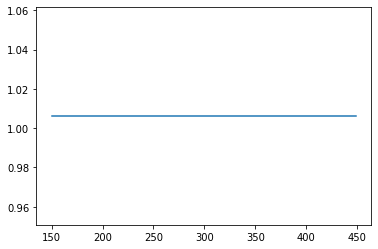

In [ ]:
result1.resid.plot()

## **Use And Remove Trends**

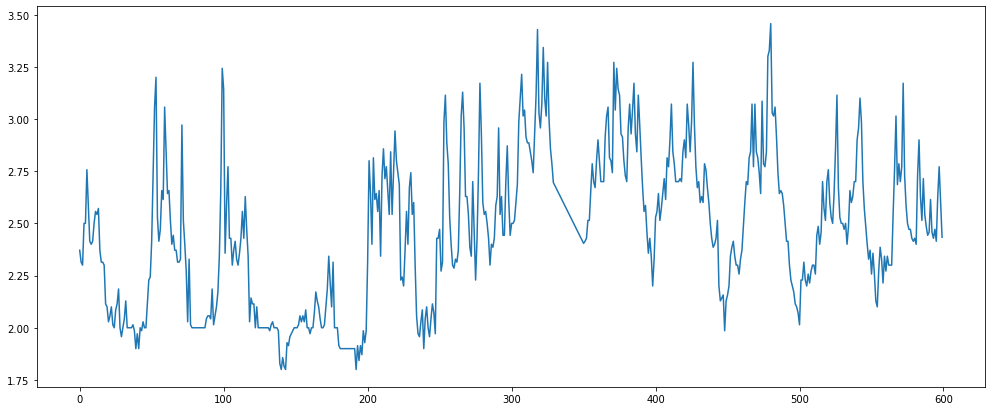

In [ ]:
series = df["river_hydrometry"]
plt.figure(figsize=(17,7))
series.plot()
plt.show()

### **Detrend by Differencing**

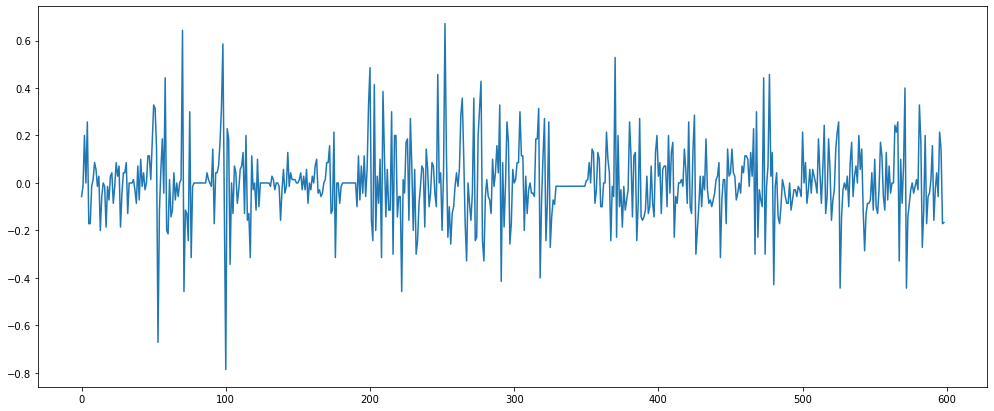

In [ ]:
series = df["river_hydrometry"]
X = series.values
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
plt.figure(figsize=(17,7))
plt.plot(diff)
plt.show()

### **Detrend by Model Fitting**

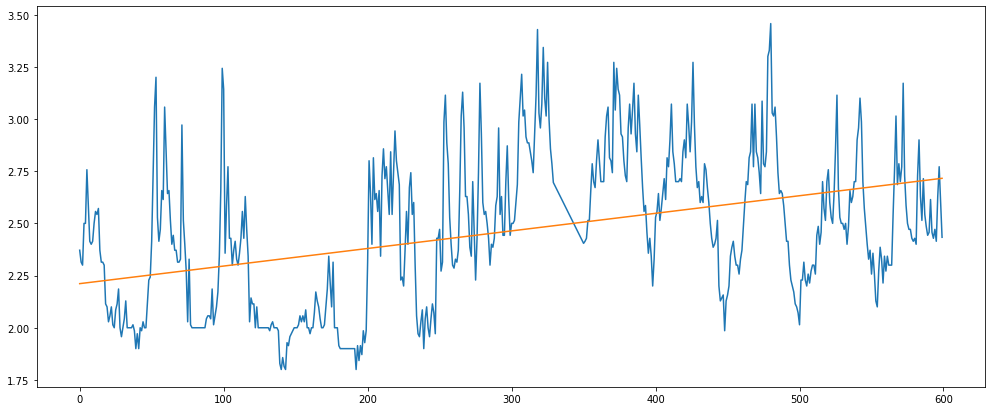

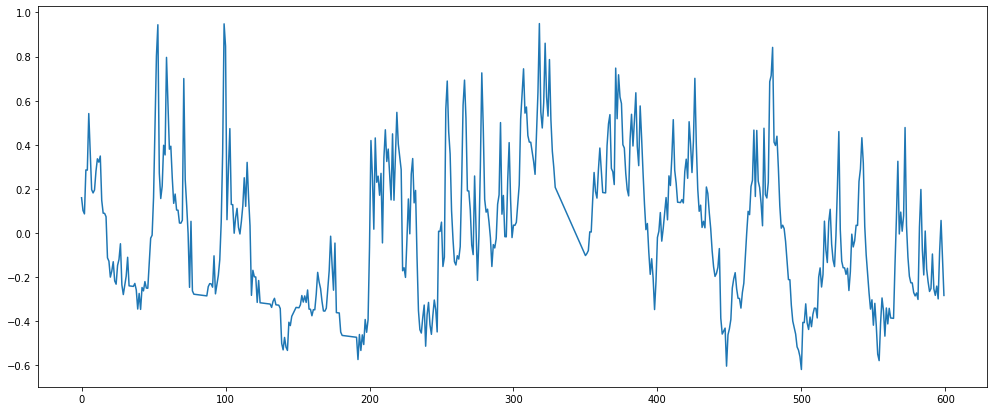

In [ ]:
from sklearn.linear_model import LinearRegression
series = df["river_hydrometry"]
# fit linear model
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.figure(figsize=(17,7))
plt.plot(y)
plt.plot(trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
plt.figure(figsize=(17,7))
plt.plot(detrended)
plt.show()

## **Models**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA 
mymodel = ARIMA(df['river_hydrometry'], order = (3, 1, 0))  
modelfit = mymodel.fit(disp = 0)  
print(modelfit.summary())

                             ARIMA Model Results                              
Dep. Variable:     D.river_hydrometry   No. Observations:                  599
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 260.604
Method:                       css-mle   S.D. of innovations              0.157
Date:                Thu, 10 Nov 2022   AIC                           -511.208
Time:                        05:38:46   BIC                           -489.232
Sample:                             1   HQIC                          -502.652
                                                                              
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0002      0.005      0.042      0.967      -0.009       0.010
ar.L1.D.river_hydrometry    -0.0837      0.041     -2.057      0.040      -0.164      -0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA 
mymodel = ARIMA(df['river_hydrometry'], order = (3, 0, 0))  
modelfit = mymodel.fit(disp = 0)  
print(modelfit.summary())

                              ARMA Model Results                              
Dep. Variable:       river_hydrometry   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                 269.963
Method:                       css-mle   S.D. of innovations              0.154
Date:                Thu, 10 Nov 2022   AIC                           -529.926
Time:                        05:38:46   BIC                           -507.942
Sample:                             0   HQIC                          -521.368
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.4619      0.067     36.662      0.000       2.330       2.593
ar.L1.river_hydrometry     0.8835      0.041     21.731      0.000       0.804       0.963
ar.L

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


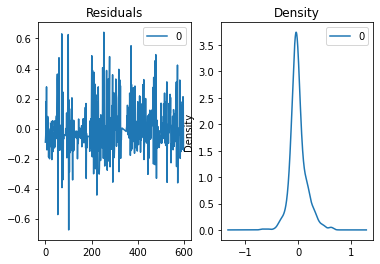

<Figure size 1440x504 with 0 Axes>

In [ ]:
# Plotting Residual Errors  
myresiduals = pd.DataFrame(modelfit.resid)  

fig, ax = plt.subplots(1,2)  
plt.figure(figsize=(20,7))
myresiduals.plot(title = "Residuals", ax = ax[0])  
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()

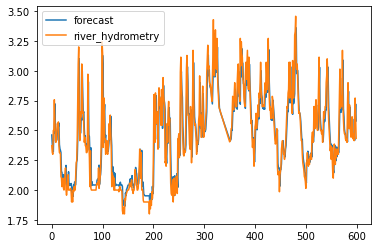

In [ ]:
# Actual vs Fitted  
modelfit.plot_predict(dynamic = False)  
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
  

predicted=2.397232, expected=2.257143
predicted=2.302841, expected=2.357143
predicted=2.380282, expected=2.257143
predicted=2.302751, expected=2.128571
predicted=2.184999, expected=2.100000
predicted=2.152447, expected=2.271429
predicted=2.298684, expected=2.385714
predicted=2.406342, expected=2.328571
predicted=2.361481, expected=2.214286
predicted=2.260369, expected=2.342857
predicted=2.364658, expected=2.271429
predicted=2.309298, expected=2.342857
predicted=2.366337, expected=2.300000
predicted=2.333416, expected=2.300000
predicted=2.330797, expected=2.300000
predicted=2.330448, expected=2.542857
predicted=2.536583, expected=2.757143
predicted=2.733906, expected=3.014286
predicted=2.969836, expected=2.685714
predicted=2.691994, expected=2.785714
predicted=2.758183, expected=2.700000
predicted=2.695822, expected=2.771429
predicted=2.749022, expected=3.171429
predicted=3.095457, expected=2.728571
predicted=2.748940, expected=2.585714
predicted=2.601398, expected=2.500000
predicted=2.

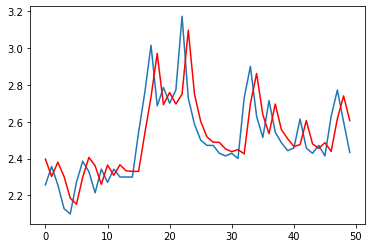

In [ ]:
from pandas import datetime
def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')
series = df["river_hydrometry"][350:]
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
  model = ARIMA(history, order=(3,0,0))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs=test[t]

  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


We are getting less RMSE when ARIMA parameters are

p:3(AR-Autoregressive)

d:0(I-Integerated)

q:0(MA-Moving Average)